# Linear Regression method

In order to predict The Bay area’s home prices, I chose the housing price dataset that was sourced from Bay Area Home 
Sales Database and Zillow. This dataset was based on the homes sold between January 2013 and December 2015. It has many 
characteristics of learning.

In [2]:
import pandas as pd 
data = pd.read_csv('final_data.csv')
data.head()

,Unnamed: 0,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,2,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: ...,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4.0,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,5,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 0...,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3.0,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,7,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: ...,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6.0,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,9,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: ...,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10.0,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,11,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: ...,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4.0,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [3]:
data.drop(data.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 13 columns):
address          11330 non-null object
bathrooms        11330 non-null float64
bedrooms         11330 non-null float64
finishedsqft     11330 non-null float64
lastsolddate     11330 non-null object
lastsoldprice    11330 non-null float64
latitude         11330 non-null float64
longitude        11330 non-null float64
neighborhood     11330 non-null object
totalrooms       11330 non-null float64
usecode          11330 non-null object
yearbuilt        11330 non-null float64
zindexvalue      11330 non-null object
dtypes: float64(8), object(5)
memory usage: 1.1+ MB


In [4]:
data['zindexvalue'] = data['zindexvalue'].str.replace(',', '')
data['zindexvalue'] = data['zindexvalue'].convert_objects(convert_numeric=True)

data.lastsolddate.min(), data.lastsolddate.max()

/home/rakesh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


('01/02/2013', '12/31/2015')

In [5]:
data.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zindexvalue
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.320205e+06
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,5.848170e+05
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,6.881000e+05
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.829000e+05
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.211900e+06
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.480400e+06
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,5.333500e+06




The count, mean, min and max rows are self-explanatory. The std shows the standard deviation, and the 25%, 50% and 75% 
rows show the corresponding percentiles.

To get a feel for the type of data we are dealing with, we plot a histogram for each numeric variable.

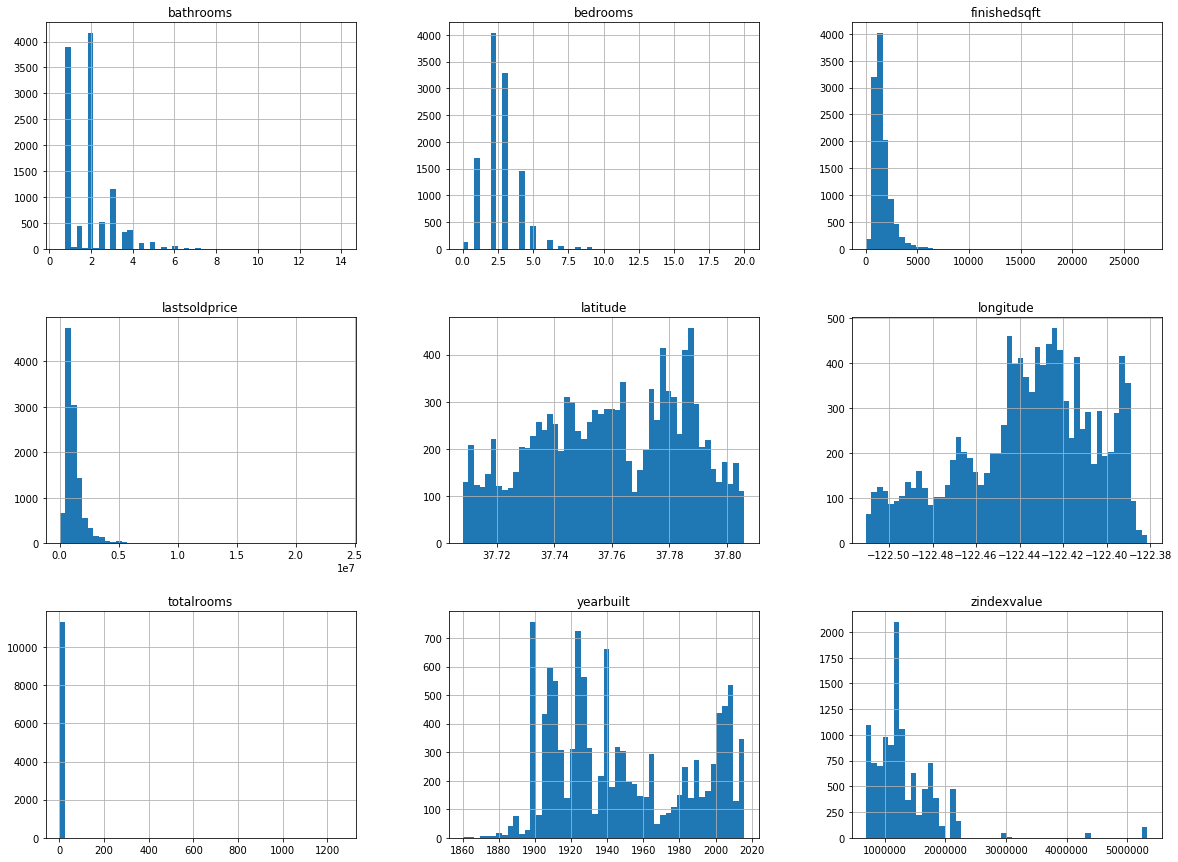

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("histogram_draw_of_the_data")
plt.show()




Let’s create a scatter plot with latitude and longitude to visualize the data:



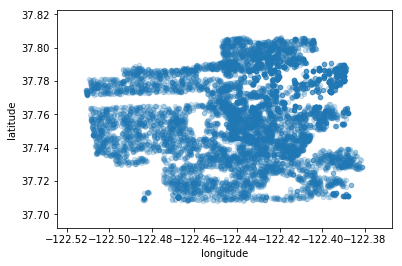

In [8]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('map1.png')

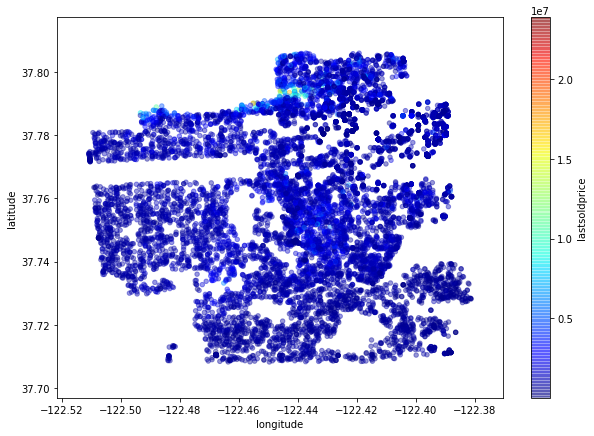

In [9]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)